# Software Notes 4 - Multiple Linear Regression, Derivation, and Complexity

Prepared for ISyE 4031 <br>
Brandon Kang <br>
brandonkang@gatech.edu

**In these software notes, I will be going through the derivation of Multiple Linear Regression, as well as some very important implications when we derive the solutions. You do *not* need to know these derivations or implications, but I strongly encourage you to go through them. Once you deal with higher dimensional datasets, these implications become highly relevant.**

**SKIP TO "Getting Started with House Data" IF YOU ARE ONLY INTERESTED IN THE CODE**

## Derivation of Parameters for Multiple Linear Regression

Recall the notation that we will be using for multiple linear regression. 
$
\newcommand\norm[1]{\left\lVert#1\right\rVert}
$

$$
\begin{align}
X \; &\epsilon \; \mathbb{R}^{nx(p+1)} \\
\hat{\beta} \; &\epsilon \; \mathbb{R}^{(p+1)x1} \\
\hat{y} &= X\beta
\end{align}
$$

From the previous software notes, we proved that the parameters derived from minimizing the least squares are the maximum likelihood estimators. This is the case with Multiple Linear Regression as well when all of the assumptions are met. Before we define the objective function, let's define a p-norm as well as a l2-norm, which is also known as the Euclidean distance.
$$
\begin{align}
\norm{x}_p &= \left(\sum_{k=1}^n|x_k|^p\right)^{1/p} \\
\norm{x}_2 &= \sqrt{\sum_{k=1}^n x_k^2}
\end{align}
$$
Using this knowledge, let's define the optimization problem.
$$
\min_\hat{\beta} \norm{y-X\hat{\beta}}_2^2
$$

Let's decompose what each matrix looks like.

$$
\begin{align}
y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix} 
, 
X = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1,p+1} \\
1 & x_{21} & x_{22} & \dots & x_{2,p+1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} & x_{N2} & \dots & x_{N,p+1} \\
\end{bmatrix},
\hat{\beta} = \begin{bmatrix}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\vdots \\
\hat{\beta}_p
\end{bmatrix}
\end{align}
$$
Now you should be able to visualize that $X\hat{\beta}$ gives you the output from the regression equation for each data point, and you should now be able to understand why the objective function is equivalent to the sum of squares of residuals. We also know from Simple Linear Regression that least squares is a convex optimization problem (since the objective is a *minimization* problem with a *convex* objective function), but we will prove this again for the Multiple Linear Regression case. In order to prove that the objective function is convex for a higher dimensional case, we must derive the Hessian. 
$$
\begin{align}
f(\beta)&=\norm{y-X\hat{\beta}}_2^2\\
&=(y-X\hat{\beta})^T(y-X\hat{\beta})\\
&=y^Ty-2\hat{\beta}^TX^Ty+\hat{\beta}^TX^TX\hat{\beta}\\
\nabla_{\hat{\beta}} f(\hat{\beta}) &= -2X^Ty+2X^TX\hat{\beta}\\
Hf(\hat{\beta})&=2X^TX
\end{align}
$$
In order to prove if a function is convex, we must prove that it the Hessian is positive semi-definite. We won't go through the derivation proving that $H$ is positive semi-definite here, but the key takeaway is that $H$ here is indeed positive semi definite, so the objective function is convex. Therefore, we reach the same conclusion as we did in Simple Linear Regression, to no surprise, that there is a closed form solution to the optimization problem. We can now derive for the optimal parameters, $\hat{\beta}$. We do this by using the gradient and solving for $\hat{\beta}$.
$$
\begin{align}
\nabla_{\hat{\beta}} f(\hat{\beta}) = -2X^Ty&+2X^TX\hat{\beta}=0\\
2X^Ty&=2X^TX\hat{\beta}\\
\hat{\beta}&=(X^TX)^{-1}X^Ty
\end{align}
$$


## Implications on Dealing with Higher Dimension Data

This is great! We were able to derive a closed form solution that minimizes the sum of squared errors. However, is this closed form solution for $\hat{\beta}$ always going to be practical? Let's analyze what the closed form solution actually tells us in terms of complexity.
$$
\begin{align}
\hat{\beta}&=(X^TX)^{-1}X^Ty
\end{align}
$$
Notice that there involes an inversion of a matrix in order to solve for $\hat{\beta}$. There are three issues that rise with this.
1. The complexity with inverting a matrix is on the order of $p^3$ or $O(p^3)$. This is *highly* problematic when we have many features, as the complexity grows to a power of 3! Matrix inversion is highly computationally expensive and may not always be the best route.
2. The matrix, $X^TX$, may not be invertible, which occurs when you have high multicollinearity (i.e high correlation between your features). This is even worse because now we can't solve for a solution. 
3. If $n<p+1$, or the number of observations is less than the number of parameters to estimate, then $X^TX$ is rank deficient, and the matrix is not invertible. Rank deficient is when your matrix is not full rank, so at least one column depends on the other. Again, this can be problematic.

## How to Deal with Complexity? Gradient Descent & Stochastic Gradient Descent

Although we won't touch on the 2nd and 3rd issues for now, I will provide a framework to attack the first problem in reducing complexity. Although solving for the optimal parameters is preferred, solving for an approximate solution is just as good, especially when the complexity is reduced significantly. Therefore, *gradient descent* can be used to solve for the parameters, which reduces the complexity down to $O(N^2p)$. You may argue that this may be highly computationally expensive if $N$ is large, which is a great observation, so we will use *stochastic gradient descent* in order to further reduce the computational expense.

### Gradient Descent

Gradient Descent is known as a first-order method in order to find a local optimum of some objective function. For convex optimization problems, gradient descent can find the *global* optimium under some general conditions. Our objective function here is to minimize the sum of squared errors, which we proved to be convex. Therefore, gradient descent here will converge to the optimium solution (under a condition). Below I define the gradient descent update rule in respect to our $\hat{\beta}$. We define $k$ as the time or the iteration.
$$
\begin{align}
\hat{\beta}^{(k+1)} &= \hat{\beta}^{(k)} - \alpha \nabla f\left(\hat{\beta}^{k}\right) \\
\hat{\beta}^{(k+1)} &= \hat{\beta}^{(k)} - \alpha \left(-2X^Ty+2X^TX\hat{\beta}^k\right) \\
\hat{\beta}^{(k+1)} &= \hat{\beta}^{(k)} - 2X^T\alpha \left(X\hat{\beta}^k-y\right)
\end{align}
$$
Gradient Descent is a *first-order* method because it uses the gradient in order to update our parameters. The above equation tells us that parameter, $\hat{\beta}$, is updated by taking the current iteration estimation of $\hat{\beta}$ and subtracting it from the product of some learning rate, $\alpha$, and the gradient. In order words, the parameter is updated by taking a step in the *negative gradient.* 

Take a step back and see why this makes sense with the illustration below. Remember we are trying to minimize some loss function. If we step in the direction of the gradient, then we are moving further away from the optimum solution. However, if we step in the negative gradient, then we would be moving closer to the optimum solution. This is why there is a *subtraction* in the update rule. In one-dimension, if the derivative is 0 at a particular point, then we have reached an optimum. This corresponds to finding the optimum parameters for $\hat{\beta}$. Gradient Descent tells us that in order to update our parameters, we need to keep stepping in the direction of the negative gradient until we have converged.

<img src="https://hackernoon.com/hn-images/0*rBQI7uBhBKE8KT-X.png"  style="height:300px">

Intuitively, imagine you have a bowl and a marble. You want to reach the lowest point in the ball, so in order to do that, you roll the ball from the top of the bowl. At the end, it'll settle at the bottom. The ball's motion in each time frame is what gradient descent is doing, and once the ball no longer moves, we know we have converged.

One condition that I was alluding to before is the correct choice of the learning rate, $\alpha$. If you choose an inappropriate $\alpha$, two things may happen.
<img src="https://qph.fs.quoracdn.net/main-qimg-85e411eb57dadf67fc3b38d84b2139b6"  style="height:300px">
1. Choosing a large $\alpha$: in each iteration, you may overstep the optimum and never converge. Imagine the ball and marble scenario. This is a bit unrealistic to imagine, but it would correspond to the ball hitting the sides of the bowl continuously and never reaching the bottom. In essence, because you are putting too much weight to the gradient in updating the parameters, you may overstep the optimum solution when iterating and may never converge.
2. Choosing a small $\alpha$: this would lead to a much longer time to converge. With the ball and marble scenario, this would lead to the ball reaching the bottom eventually but much longer since the gradient is weighed less in each iteration. 

### Stochastic Gradient Descent

Previously, I mentioned that gradient descent can be computationally expensive when $N$ is large. In order to alleviate this, stochastic gradient descent is used widely when dealing with large datasets. The only difference between the two is that SGD uses mini-batches, or a smaller subsets of the data (or even just 1 data point), in order to compute the gradient. 
<img src="https://engmrk.com/wp-content/uploads/2018/04/Fig2.png"  style="height:300px">

Therefore, the fundamental difference is that whereas gradient descent always steps in the negative gradient, SGD may not always step in the "correct" direction in every iteration since it doesn't use the entire data. However, computing the gradient in each iteration is **much faster** since we are using less of the data in each iteration, and SGD still converges. For convex problems, SGD will still eventually reach the optimum solution with an appropriate learning rate. For non-convex optimization problems, SGD can actually perform better than gradient descent, as the noise is actually beneficial.

## Dealing with Complexity Conclusions

For the scope of the course, we will be mainly dealing with small datasets, so directly solving for the optimum parameters are not concerning in terms of computational efficiency. Therefore, you can just directly plug into whatever Linear Regression solver and produce results. However, if you decide to use a much larger dataset with a high feature dimensionality for your project, it may be a good idea to explore into implementations of linear regression with stochastic gradient descent, such as **Sci-Kit Learn's SGDRegressor** (although it would be a good idea to first reduce the feature space). Furthermore, stochastic gradient descent performs well efficiency wise when you have a large number of observations as opposed to gradient descent as we explained above.

# Getting Started with House Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
from statsmodels.formula.api import ols
jtplot.style(theme='onedork')

Here I introduce another dataset that contains house prices that we are trying to predict. It contains the number of bedrooms, bathrooms, size, and status of the home as predictors.

In [58]:
dfHouses = pd.read_csv("RealEstate.csv", index_col=0)
dfHouses = dfHouses.drop(["Price/SQ.Ft", "Location"], axis=1) 
dfHouses = dfHouses[dfHouses["Bedrooms"]>0]
dfHouses.head()

,Price,Bedrooms,Bathrooms,Size,Status
MLS,,,,,
132842,795000.0,3,3,2371,Short Sale
134364,399000.0,4,3,2818,Short Sale
135141,545000.0,4,3,3032,Short Sale
135712,909000.0,4,4,3540,Short Sale
136282,109900.0,3,1,1249,Short Sale


## Adding Higher Order/Interaction Terms 

When thinking about the price of a home, the proportion of bedrooms to bathrooms may be important. After all, people may prefer having a bathroom for every bedroom, but that may incur cost. We can test that hypothesis by introducing another variable, "propBathrooms," the proportion of bathrooms per bedroom. 

In [59]:
dfHouses["propBathrooms"] = dfHouses["Bathrooms"]/dfHouses["Bedrooms"]
dfHouses.head()

,Price,Bedrooms,Bathrooms,Size,Status,propBathrooms
MLS,,,,,,
132842,795000.0,3,3,2371,Short Sale,1.000000
134364,399000.0,4,3,2818,Short Sale,0.750000
135141,545000.0,4,3,3032,Short Sale,0.750000
135712,909000.0,4,4,3540,Short Sale,1.000000
136282,109900.0,3,1,1249,Short Sale,0.333333


## Visualizing Relationships with Matrix Plot

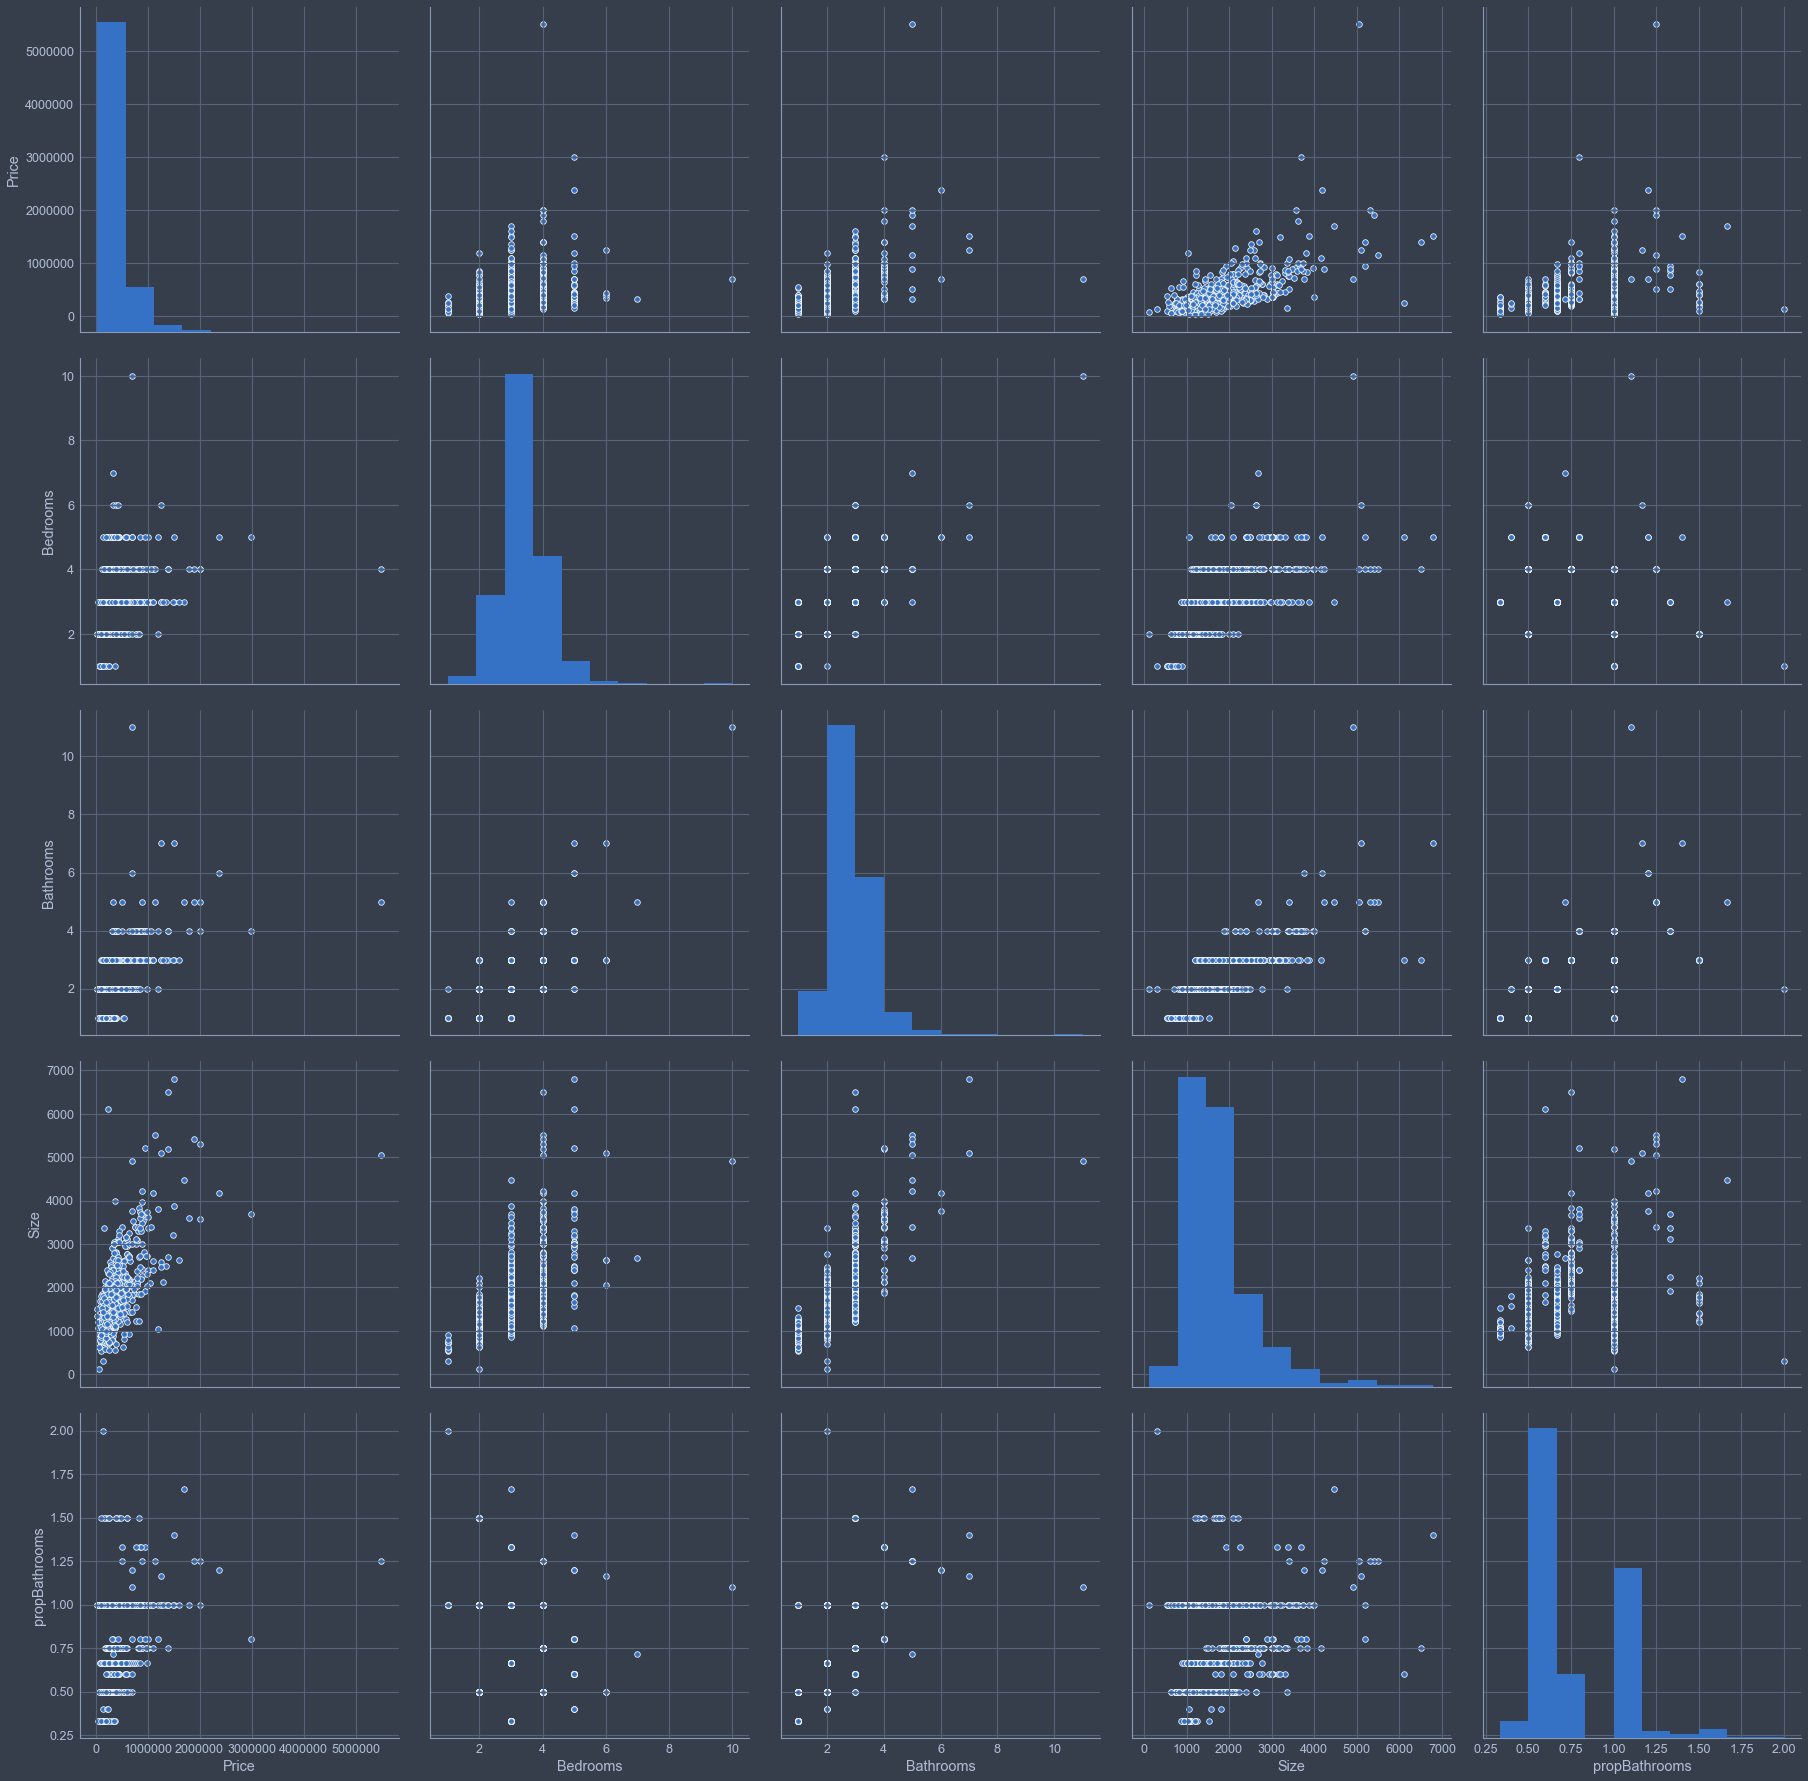

In [60]:
sns.pairplot(dfHouses, height=5)

## Implementation of Multiple Linear Regression

**There are multiple ways you can implement regression with categorial variables. You can just follow one of the two sections I listed below. I suggest learning the Pandas' get_dummies version since it is used widely and useful when you are not using StatsModels.**

### Implementation of MLR with Categoricals Stated in Model 

In [61]:
model = ols("Price ~ Bedrooms + Bathrooms + Size + propBathrooms + C(Status)", data=dfHouses).fit() 
model.summary() #note that Foreclosure is the base level in the output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          1.48e-123
Time:                        21:53:10   Log-Likelihood:                -10753.
No. Observations:                 779   AIC:                         2.152e+04
Df Residuals:                     772   BIC:                         2.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3.316e+05   1.09e+05      3.042      0.002    1.18e+05    5.46e+05
C(Status)[T.Regular]     2.112e+05   3.06e+04      6.906      0.000    1.51e+05    2.71e+05
C(Status)[T.Short Sale] -2.531e+04   2.18e+04     -1.162      0.246   -6.81e+04    1.75e+04
Bedrooms                -1.792e+05   3.26e+04     -5.492      0.000   -2.43e+05   -1.15e+05
Bathrooms                1.591e+05      4e+04      3.975      0.000    8.05e+04    2.38e+05
Size                      288.9447     17.067     16.930      0.000     255.442     322.447
propBathrooms            -3.63e+05   1.19e+05     -3.060      0.002   -5.96e+05    -1.3e+05
==============================================================================
Omnibus:                     1005.723   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290272.484
Skew:                           6.330   Prob(JB):                         0.00
Kurtosis:                      96.716   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Implementation of MLR Using Pandas's get_dummies

In [62]:
dfHouses = pd.get_dummies(dfHouses, prefix=["Status"]).rename({"Status_Short Sale": "Status_ShortSale"}, axis=1)
dfHouses

,Price,Bedrooms,Bathrooms,Size,propBathrooms,Status_Foreclosure,Status_Regular,Status_ShortSale
MLS,,,,,,,,
132842,795000.0,3,3,2371,1.000000,0,0,1
134364,399000.0,4,3,2818,0.750000,0,0,1
135141,545000.0,4,3,3032,0.750000,0,0,1
135712,909000.0,4,4,3540,1.000000,0,0,1
136282,109900.0,3,1,1249,0.333333,0,0,1
...,...,...,...,...,...,...,...,...
154562,319900.0,3,3,1605,1.000000,0,1,0
154565,495000.0,3,2,1877,0.666667,0,1,0
154566,372000.0,3,2,1104,0.666667,1,0,0


In [63]:
model = ols("Price ~ Bedrooms + Bathrooms + Size + propBathrooms + Status_ShortSale + Status_Regular", data=dfHouses).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          1.48e-123
Time:                        21:53:10   Log-Likelihood:                -10753.
No. Observations:                 779   AIC:                         2.152e+04
Df Residuals:                     772   BIC:                         2.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.316e+05   1.09e+05      3.042      0.002    1.18e+05    5.46e+05
Bedrooms         -1.792e+05   3.26e+04     -5.492      0.000   -2.43e+05   -1.15e+05
Bathrooms         1.591e+05      4e+04      3.975      0.000    8.05e+04    2.38e+05
Size               288.9447     17.067     16.930      0.000     255.442     322.447
propBathrooms     -3.63e+05   1.19e+05     -3.060      0.002   -5.96e+05    -1.3e+05
Status_ShortSale -2.531e+04   2.18e+04     -1.162      0.246   -6.81e+04    1.75e+04
Status_Regular    2.112e+05   3.06e+04      6.906      0.000    1.51e+05    2.71e+05
==============================================================================
Omnibus:                     1005.723   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290272.484
Skew:                           6.330   Prob(JB):                         0.00
Kurtosis:                      96.716   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""